# Fronteira eficiente
## Bibliotecas

In [ ]:
!pip install pandas
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

     |████████████████████████████████| 11.4 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 18.1 MB 37.3 MB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-datareader 0.10.0 requires lxml, which is not installed.


ModuleNotFoundError: No module named 'matplotlib'

## Ativos e período observasdo

In [ ]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2021,6,22)

In [ ]:
jhsf = web.DataReader('JHSF3.SA','yahoo',start,end)
itausa = web.DataReader('ITSA4.SA','yahoo',start,end)
log = web.DataReader('LOGG3.SA','yahoo',start,end)
vulc = web.DataReader('VULC3.SA','yahoo',start,end) 
Iguatemi = web.DataReader('IGTA3.SA','yahoo',start,end)
btg = web.DataReader('BPAC11.SA','yahoo',start,end)

In [ ]:
carteira = pd.concat([jhsf['Close'], itausa['Close'], log['Close'], vulc['Close'], Iguatemi['Close'], btg['Close']],axis=1)
carteira.columns = ['JHSF3.SA','ITSA4.SA','LOGG3.SA','VULC3.SA','IGTA3.SA','BPAC11.SA']
carteira

,JHSF3.SA,ITSA4.SA,LOGG3.SA,VULC3.SA,IGTA3.SA,BPAC11.SA
Date,,,,,,
2019-01-02,2.00,12.65,16.850000,7.32,42.430000,6.225000
2019-01-03,1.98,12.76,16.600000,7.40,42.820000,6.482500
2019-01-04,1.94,12.72,16.090000,7.27,41.750000,6.712500
2019-01-07,1.99,12.71,15.620000,7.26,41.099998,6.850000
2019-01-08,1.98,12.88,15.870000,7.37,40.549999,6.552500
...,...,...,...,...,...,...
2021-06-16,7.48,11.93,30.719999,9.50,42.330002,30.612499
2021-06-17,7.39,11.82,30.969999,9.47,42.160000,30.577499
2021-06-18,7.37,11.71,32.799999,9.58,42.900002,30.537500


## Rendimentos

calculado pela fórmula: $$ r_t={P_t\over P_t-1} $$
onde P é o preço e t o período

In [ ]:
rendimentos = carteira/carteira.shift(1)
rendimentos

,JHSF3.SA,ITSA4.SA,LOGG3.SA,VULC3.SA,IGTA3.SA,BPAC11.SA
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.990000,1.008696,0.985163,1.010929,1.009192,1.041365
2019-01-04,0.979798,0.996865,0.969277,0.982432,0.975012,1.035480
2019-01-07,1.025773,0.999214,0.970789,0.998625,0.984431,1.020484
2019-01-08,0.994975,1.013375,1.016005,1.015151,0.986618,0.956569
...,...,...,...,...,...,...
2021-06-16,0.992042,1.009306,0.982725,0.997899,0.974448,1.003442
2021-06-17,0.987968,0.990779,1.008138,0.996842,0.995984,0.998857
2021-06-18,0.997294,0.990694,1.059089,1.011616,1.017552,0.998692


In [ ]:
logrendimentos = np.log(rendimentos)
logrendimentos

,JHSF3.SA,ITSA4.SA,LOGG3.SA,VULC3.SA,IGTA3.SA,BPAC11.SA
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.010050,0.008658,-0.014948,0.010870,0.009150,0.040533
2019-01-04,-0.020409,-0.003140,-0.031205,-0.017724,-0.025306,0.034865
2019-01-07,0.025447,-0.000786,-0.029646,-0.001376,-0.015691,0.020277
2019-01-08,-0.005038,0.013287,0.015878,0.015038,-0.013472,-0.044402
...,...,...,...,...,...,...
2021-06-16,-0.007989,0.009263,-0.017425,-0.002103,-0.025885,0.003436
2021-06-17,-0.012105,-0.009263,0.008105,-0.003163,-0.004024,-0.001144
2021-06-18,-0.002710,-0.009350,0.057410,0.011549,0.017400,-0.001309


## Índice Sharpe
dado por: $$ SR(w)={R(w)-R_f \over \sigma(w)} $$ 
onde $ w $ é o peso do ativo na carteira;
$ R(w) $ é o retorno com o peso w;
$ \sigma(w) $ representa a volatilidade com o peso w do ativo

no fim estamos interessados em maximizar o $ SR(w) $, que pode ser representado de forma aproximada ao dividir o produto da matriz transposta $ w $ e dos retornos logaritimizados por $ \sigma(w) $. Logo temos: $$ SR(w)\approx{wˆt\log(r) \over \sigma(w)} $$


## Retorno vs volatilidade
gerar possíveis portfólios

In [ ]:
número_portfólios = 100000
peso = np.zeros((número_portfólios,6))
expectedReturn = np.zeros((número_portfólios))
expectedvolatility = np.zeros((número_portfólios))
sharperatio = np.zeros((número_portfólios))
                       
for k in range(número_portfólios):
    
    #gerar vetor de pesos aleatório
    w = np.array(np.random.random(6))
    w = w / np.sum(w)
    peso[k,:] = w
    
    #retrono logaritimizado esperado
    meanLogRet = logrendimentos.mean()
    expectedReturn[k] = np.sum(meanLogRet * w)
    
    #volatilidade esperada
    Sigma = logrendimentos.cov()
    expectedvolatility[k] = np.sqrt(np.dot(w.T,np.dot(Sigma,w)))
    
    #Sharpe ratio
    sharperatio[k] = expectedReturn[k]/expectedvolatility[k]

## Peso das alocações ideais
vetor $ w $ obtido para maximizar $ SR $ (índice Sharpe) 

In [ ]:
maxIndex = sharperatio.argmax()
peso[maxIndex,:]

array([0.37644024, 0.00893497, 0.09027625, 0.02187277, 0.01812682,
       0.48434894])

## Gráfico com 100000 portfólios possíveis

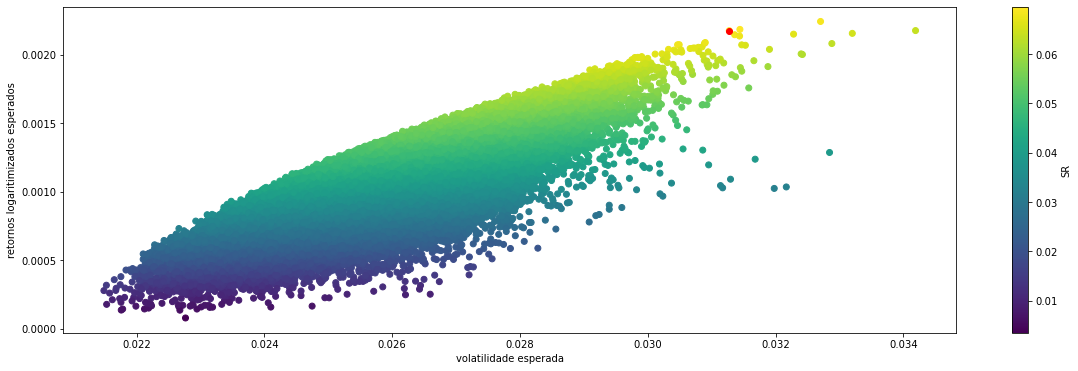

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(expectedvolatility,expectedReturn,c=sharperatio)
plt.xlabel('volatilidade esperada')
plt.ylabel('retornos logaritimizados esperados')
plt.colorbar(label='SR')
plt.scatter(expectedvolatility[maxIndex],expectedReturn[maxIndex],c='red')
plt.show()
#ponto onde os pesos maximizam SR está em vermelho

## Fronteira eficiente

In [ ]:
import numpy as np
returns = np.linspace(0,0.0025,50)
volatility_opt = []
def minimizeMyVolatility(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T,np.dot(Sigma,w)))
    return V
w0 = [0.18,0.15,0.16,0.18,0.18,0.15] #chute inicial 
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
constraints = ({'type':'eq', 'fun':checkSumToOne})
def getReturn(w):
    w = np.array(w)
    R = np.sum(meanLogRet*w)
    return R
for R in returns:
    constraints = ({'type':'eq', 'fun':checkSumToOne},{'type':'eq','fun':lambda w:getReturn(w)-R})
    opt = minimize(minimizeMyVolatility,w0,method='SLSQP',bounds=bounds,constraints=constraints)
    volatility_opt.append(opt['fun'])
volatility_opt

[0.02120788013383857,
 0.021145661370241407,
 0.0211414227162127,
 0.021171798269014466,
 0.02122778901332706,
 0.02130934329114078,
 0.021397772737410774,
 0.021504586443399653,
 0.0216228722752012,
 0.021752234958967477,
 0.02189325579126669,
 0.022045343829141594,
 0.02220790952546316,
 0.022381027625254533,
 0.022564599078998524,
 0.02275796946815499,
 0.022961529523243786,
 0.02318382766958972,
 0.023400109456490504,
 0.02362933792968808,
 0.023870988870754457,
 0.024125879534458678,
 0.02438654592786174,
 0.024638253096614268,
 0.024910624349529644,
 0.025191151978889492,
 0.0254779979113762,
 0.025772492248798063,
 0.026073419294816477,
 0.026381036840618984,
 0.026694962438291506,
 0.027014976431168826,
 0.027340864655247984,
 0.027698403116036403,
 0.028036370840600906,
 0.02837856433867331,
 0.028725796310685663,
 0.029076569215932924,
 0.029432599281088337,
 0.02979109063224569,
 0.030154859467092655,
 0.030518447309556336,
 0.030887339559258768,
 0.03128228412930885,
 0.031

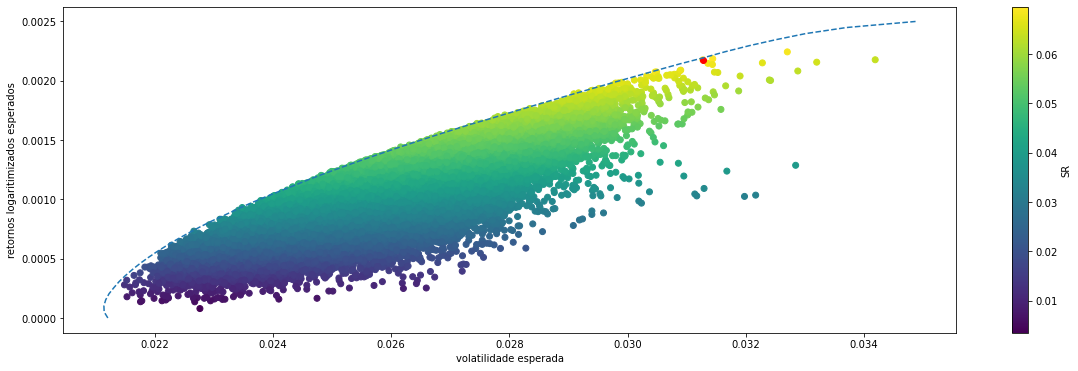

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(expectedvolatility,expectedReturn,c=sharperatio)
plt.xlabel('volatilidade esperada')
plt.ylabel('retornos logaritimizados esperados')
plt.colorbar(label='SR')
plt.scatter(expectedvolatility[maxIndex],expectedReturn[maxIndex],c='red')
plt.plot(volatility_opt,returns,'--')
plt.show()